# Classificação de uma imagem

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import model_from_json

import warnings
warnings.filterwarnings('ignore')

2023-06-27 03:44:37.599215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/clesio/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-06-27 03:44:37.599250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
image_path = 'dataset/Negativo/CM200826-121617009.jpg'
json_path = 'modelo/inception_resnet_v2.json'
model_path = 'modelo/inception_resnet_v2.h5'

img_altura = 299
img_largura = 299

In [3]:
# Lendo o modelo do arquivo JSON
with open(json_path, 'r') as json_file:
    json_modelo_salvo = json_file.read()
    
# leitura do modelo
model = model_from_json(json_modelo_salvo)
model.summary()

2023-06-27 03:44:38.934724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/clesio/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-06-27 03:44:38.934759: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-27 03:44:38.934782: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (clesio-Inspiron-5448): /proc/driver/nvidia/version does not exist
2023-06-27 03:44:38.934978: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0     

In [4]:
# leitura dos pesos
model.load_weights(model_path)

In [5]:
def preprocessamento_imagem(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_altura, img_altura)) # redimensiona
    img = img_to_array(img) # array numpy
    img = np.expand_dims(img, axis = 0) # formato de um tensor
    img = preprocess_input(img) # entradas no padrão da rede
    return img

In [11]:
img = preprocessamento_imagem(image_path)

In [12]:
prediction = model.predict(img)

In [13]:
prediction = (prediction > 0.5).astype(np.uint8)

Text(0.5, 1.0, '[1]')

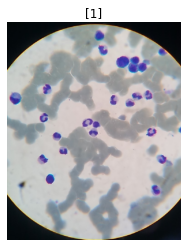

In [14]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title(prediction[0])